# Trends: data exploration


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from IPython.display import display, HTML, Markdown
from vol4life.vol4life.plot import plot_acf, plot_ccf
from vol4life.vol4life.stats import autocorrelation_f
from word_list.basic import politics1, politics2
from word_list.basic import business

## Create trends df from daily information

In [2]:
trends_path = os.path.join('data','daily_trend',"*.csv")
daily_dfs_path =  glob(trends_path)
daily_dfs_path.sort()
daily_dfs = [pd.read_csv(path) for path in daily_dfs_path]
daily_dfs_names = [i.split("/")[2] for i in daily_dfs_path]
daily_dfs_names = [i.split(".")[0] for i in daily_dfs_names]

trends_df = []
for name, df in zip(daily_dfs_names, daily_dfs):
    df.index = pd.to_datetime(df.date)
    ts = df[name]
    new_name = name.replace(" ", "_")
    ts.name = new_name
    trends_df.append(ts)

final_date = "2020-07-25"
trends_df = pd.concat(trends_df,1)
trends_df = trends_df[:final_date]
trends_df = trends_df.fillna(0.0)
trends_df = trends_df / 100
word_features = list(trends_df.columns)
word_features.sort()
trends_df = trends_df[word_features]
display(Markdown("### Google trends data"))
display(HTML(trends_df.head(5).to_html()))
display(Markdown("#### data shape = {}".format(trends_df.shape)))

### Google trends data

,BUY_AND_HOLD,DOW_JONES,act,arts,banking,bonds,bubble,buy,cancer,car,carolina,case,cash,chance,college,color,committee,conflict,consume,consumption,conty,council,county,court,crash,credit,crisis,culture,debt,default,democratic,derivatives,district,dividend,dow_jones,earnings,earths,economics,economy,elected,election,elections,energy,environment,fed,federal,finance,financial,fine,fond,food,forex,freedom,fun,gain,gains,garden,georgia,gold,government,governor,greed,growth,happy,headlines,health,hedge,holiday,home,house,housing,illinois,inflation,invest,investment,judge,justice,kentucky,kitchen,labor,law,legal,leverage,lifestyle,loss,market,markets,marriage,massachusetts,members,metals,minister,ministry,missouri,money,movement,movie,nasdaq,notability,nyse,office,ohio,oil,opportunity,ore,party,pennsylvania,police,political,politics,portfolio,present,president,profit,rare,religion,representatives,republican,restaurant,return,returns,revenue,rich,rights,ring,risk,seats,secretary,security,sell,selling,senate,served,short,society,stats,stock,stocks,success,tennessee,texas,tourism,trader,train,transaction,travel,unemployment,union,vermount,virginia,voter,votes,war,washington,water,william,winsconsin,world,york
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.00,0.01,0.14,0.25,0.04,0.09,0.05,0.86,0.18,0.77,0.55,0.31,0.10,0.03,0.63,0.27,0.04,0.03,0.00,0.02,0.0,0.09,0.52,0.20,0.11,0.52,0.03,0.06,0.05,0.05,0.05,0.01,0.22,0.01,0.01,0.01,0.01,0.07,0.04,0.00,0.05,0.01,0.13,0.04,0.04,0.33,0.06,0.16,0.13,0.00,0.70,0.01,0.11,0.22,0.06,0.00,0.32,0.43,0.27,0.17,0.02,0.00,0.08,0.25,0.00,0.47,0.01,0.34,0.98,0.85,0.12,0.37,0.01,0.01,0.07,0.04,0.06,0.16,0.27,0.06,0.35,0.14,0.00,0.03,0.11,0.26,0.03,0.09,0.27,0.07,0.01,0.00,0.03,0.26,0.29,0.02,1.00,0.01,0.0,0.01,0.54,0.58,0.28,0.02,0.01,0.35,0.28,0.26,0.06,0.03,0.06,0.03,0.08,0.03,0.03,0.07,0.02,0.04,0.57,0.30,0.04,0.03,0.07,0.07,0.37,0.05,0.06,0.03,0.31,0.07,0.05,0.01,0.01,0.18,0.31,0.08,0.30,0.08,0.03,0.20,0.66,0.11,0.16,0.23,0.01,0.63,0.07,0.44,0.00,0.53,0.01,0.01,0.36,0.60,0.53,0.28,0.00,0.80,0.80
2004-01-02,0.00,0.02,0.17,0.25,0.03,0.05,0.03,0.76,0.19,0.77,0.49,0.26,0.09,0.02,0.81,0.25,0.03,0.04,0.00,0.02,0.0,0.11,0.82,0.33,0.11,0.66,0.03,0.08,0.05,0.06,0.05,0.01,0.32,0.01,0.03,0.01,0.01,0.04,0.03,0.00,0.03,0.02,0.17,0.04,0.04,0.47,0.11,0.31,0.11,0.01,0.52,0.01,0.05,0.15,0.04,0.02,0.29,0.48,0.29,0.26,0.03,0.01,0.07,0.18,0.01,0.71,0.02,0.28,0.99,0.95,0.14,0.53,0.02,0.01,0.10,0.03,0.06,0.15,0.21,0.09,0.52,0.14,0.01,0.02,0.12,0.27,0.03,0.14,0.27,0.06,0.02,0.02,0.03,0.24,0.31,0.04,0.95,0.03,0.0,0.02,0.69,0.63,0.26,0.02,0.01,0.33,0.32,0.30,0.10,0.03,0.02,0.03,0.11,0.03,0.05,0.05,0.01,0.03,0.44,0.25,0.02,0.08,0.08,0.10,0.30,0.06,0.06,0.10,0.43,0.09,0.05,0.03,0.01,0.14,0.33,0.04,0.35,0.10,0.04,0.18,0.77,0.10,0.11,0.21,0.01,0.59,0.09,0.54,0.00,0.61,0.02,0.01,0.41,0.80,0.55,0.32,0.01,0.94,0.91
2004-01-03,0.00,0.01,0.16,0.22,0.05,0.05,0.06,0.89,0.21,0.89,0.40,0.27,0.09,0.03,0.70,0.35,0.03,0.03,0.00,0.02,0.0,0.09,0.69,0.23,0.13,0.60,0.05,0.06,0.02,0.06,0.05,0.01,0.26,0.02,0.02,0.01,0.00,0.03,0.05,0.01,0.03,0.01,0.12,0.04,0.03,0.34,0.07,0.14,0.14,0.01,0.51,0.01,0.09,0.17,0.08,0.01,0.29,0.41,0.27,0.19,0.02,0.00,0.06,0.13,0.01,0.53,0.01,0.26,0.93,0.95,0.09,0.44,0.01,0.01,0.07,0.03,0.07,0.15,0.26,0.06,0.43,0.13,0.00,0.01,0.13,0.32,0.03,0.11,0.27,0.08,0.01,0.02,0.05,0.23,0.28,0.06,0.97,0.02,0.0,0.01,0.62,0.65,0.28,0.02,0.01,0.36,0.27,0.26,0.07,0.02,0.02,0.01,0.10,0.03,0.04,0.08,0.02,0.04,0.50,0.26,0.02,0.07,0.09,0.08,0.36,0.05,0.05,0.05,0.28,0.10,0.05,0.02,0.01,0.19,0.30,0.06,0.27,0.08,0.02,0.17,0.67,0.09,0.10,0.26,0.02,0.54,0.06,0.43,0.00,0.55,0.01,0.01,0.51,0.72,0.47,0.29,0.00,0.81,0.75
2004-01-04,0.01,0.01,0.18,0.26,0.05,0.06,0.06,0.81,0.17,0.84,0.51,0.26,0.10,0.03,0.68,0.27,0.03,0.04,0.01,0.03,0.0,0.10,0.67,0.27,0.10,0.53,0.03,0.07,0.05,0.07,0.08,0.02,0.31,0.02,0.01,0.01,0.00,0.03,0.04

#### data shape = (6051, 159)

In [3]:
politics1_inter = list(set(politics1).intersection(word_features))
politics1_inter.sort()
politics1_not_present = [w for w in politics1 if w not in word_features]
politics1_not_present

['wisconsin', 'vermont']

In [4]:
politics2_inter = list(set(politics2).intersection(word_features))
politics2_inter.sort()
politics2_not_present = [w for w in politics2 if w not in word_features]
politics2_not_present

['voters']

In [5]:
business_inter = list(set(business).intersection(word_features))
business_inter.sort()
business_not_present = [w for w in business if w not in word_features]
business_not_present

['blacklist',
 'business',
 'management',
 'services',
 'companies',
 'development',
 'bank',
 'founded',
 'million',
 'industry',
 'products',
 'global',
 'marketing',
 'ceo',
 'technology',
 'inc',
 'social',
 'media',
 'project',
 'firm',
 'service',
 'economic',
 'community',
 'corporation',
 'ltd']

### Word Signal

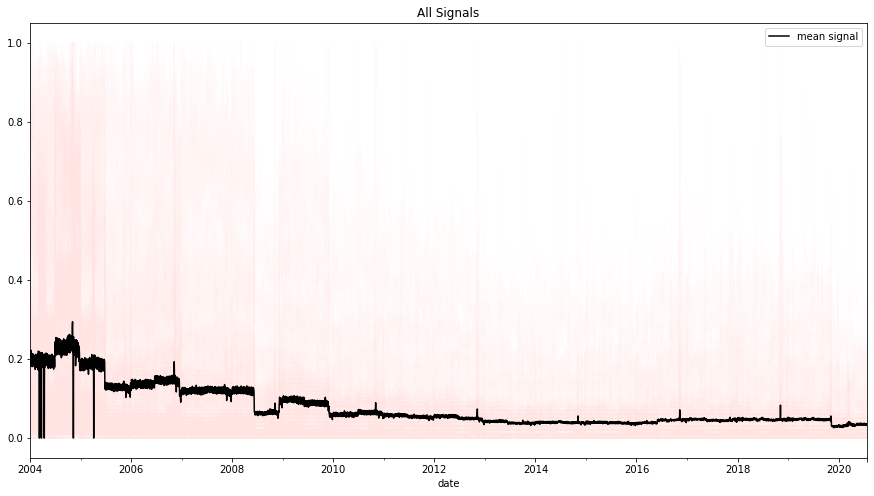

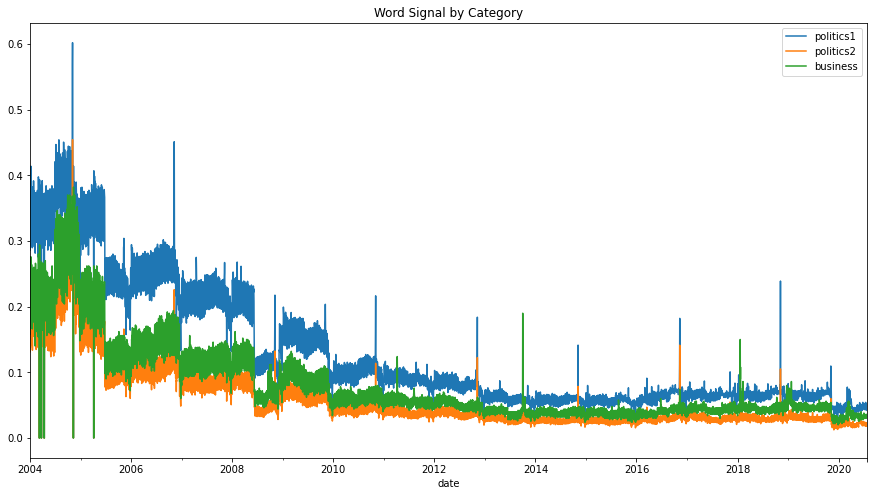

In [6]:
trends_df_p = trends_df.copy()
trends_df_p.columns = [""]* trends_df_p.shape[1]

politics1_ts = trends_df[politics1_inter].mean(1)
politics1_ts.name = "politics1"
politics2_ts = trends_df[politics2_inter].mean(1)
politics2_ts.name = "politics2"
business_ts = trends_df[business_inter].mean(1)
business_ts.name = "business"

display(Markdown("### Word Signal"))
fig, ax = plt.subplots(figsize=(15,8))
trends_df_p.plot(ax=ax,legend=False,alpha= 0.05,  color="mistyrose");
trends_df.mean(1).plot(ax=ax,legend=False, color="k", label="mean signal");
ax.set_title("All Signals");
ax.legend(loc="best");


fig, ax = plt.subplots(figsize=(15,8))
politics1_ts.plot(ax=ax);
politics2_ts.plot(ax=ax);
business_ts.plot(ax=ax);
ax.set_title("Word Signal by Category");
ax.legend(loc="best");

### Google Trends Correlation

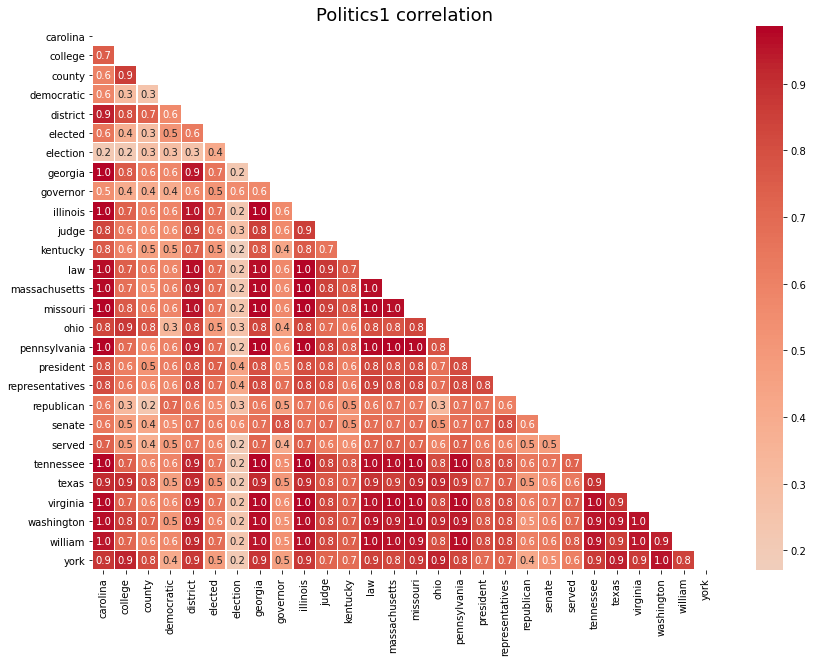

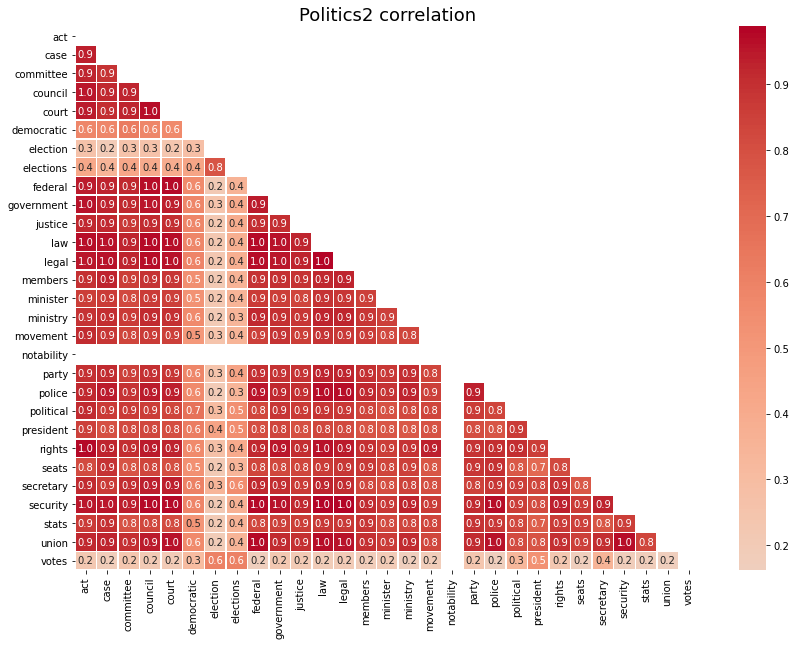

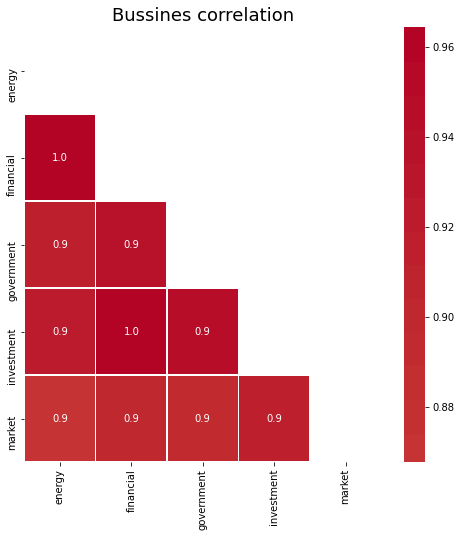

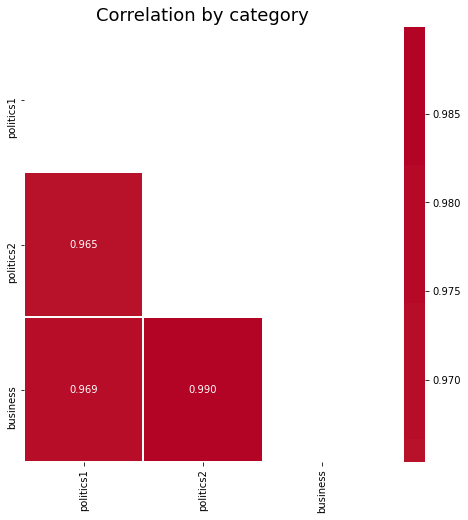

In [7]:
display(Markdown("### Google Trends Correlation"))

corr = trends_df[politics1_inter].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(14,10))
ax.set_title("Politics1 correlation", fontsize=18)
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.5, annot=True, fmt=".1f", ax=ax);
plt.xticks(rotation=90);


corr = trends_df[politics2_inter].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(14,10))
ax.set_title("Politics2 correlation", fontsize=18)
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.5, annot=True, fmt=".1f", ax=ax);
plt.xticks(rotation=90);


corr = trends_df[business_inter].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Bussines correlation", fontsize=18)
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.5, annot=True, fmt=".1f", ax=ax);
plt.xticks(rotation=90);

signal_cat = pd.concat([politics1_ts, politics2_ts, business_ts],1)
corr = signal_cat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Correlation by category", fontsize=18)
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.5, annot=True, fmt=".3f", ax=ax);
plt.xticks(rotation=90);


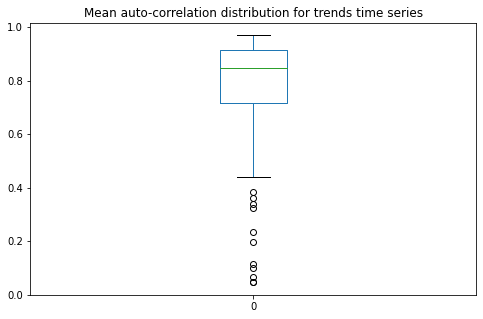

In [8]:
# remove columns with 0 only
trends_df_filter = trends_df.loc[:, (trends_df != 0).any(axis=0)]
columns = trends_df_filter.columns

auto_correlation = []
lags = 30

for c in columns:
    trend = trends_df_filter[c]
    auto_correlation.append(np.mean(autocorrelation_f(trend,lags)[1:]))
auto_correlation = pd.Series(auto_correlation, index=columns).to_frame()

fig, ax = plt.subplots(figsize=(8,5))
auto_correlation.boxplot(ax=ax, grid=False);
ax.set_title("Mean auto-correlation distribution for trends time series");

In [9]:
assert False

AssertionError: 

## Market data returns

In [ ]:
asset = "es1"
market_path = os.path.join('data','market',"{}.txt".format(asset))
df_market = pd.read_csv(market_path, sep='\t')
close_price_column = 'PX_LAST'
date_column='date'
df_market.loc[:, date_column] = pd.to_datetime(df_market[date_column])
df_market = df_market.set_index(date_column)
close = df_market[[close_price_column]].dropna()
close = close.pct_change().dropna()
return_column = "{}_returns".format(asset)
close.columns = [return_column]
close.head(5)

## Merging market data and trends data

In [ ]:
merged_df = pd.merge_asof(trends_df, close, left_index=True, right_index=True)
merged_df = merged_df[[return_column] + word_features]
display(Markdown("### Merged data"))
display(HTML(merged_df.head(5).to_html()))
display(Markdown("#### data shape = {}".format(merged_df.shape)))

### Exploring only one part of the data

In [ ]:
small_df = merged_df[:"2010"].copy()
small_df.head(5)

### Autocorrelation

In [ ]:
returns = small_df.es1_returns
trend = small_df.banking

plot_acf(returns, lag_range=41, out_path=None, acf_function=autocorrelation_f)

plot_acf(trend, lag_range=41, out_path=None, acf_function=autocorrelation_f)

In [ ]:
auto_correlation = []
lags = 30

for c in word_features:
    trend = small_df[c]
    auto_correlation.append(np.mean(autocorrelation_f(trend,lags)[1:]))
auto_correlation = pd.Series(auto_correlation, index=word_features).to_frame()

fig, ax = plt.subplots(figsize=(8,5))
auto_correlation.boxplot(ax=ax, grid=False);
ax.set_title("Mean auto-correlation distribution for trends time series");


In [ ]:
corr = small_df[word_features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(14,10))
ax.set_title("All words correlation", fontsize=18)
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.5, annot=False, fmt=".2f", ax=ax, cbar=True);
plt.xticks(rotation=90);

## Evaluation Draft

**We use the Time series cross validation from sklearn to observe the distribution
of the statistics related to a simple linear regresion. The model is based only in one
trend word. It tries to predict the next day return of the selected asset**

In [ ]:
# Using only a part of the data

small_df = merged_df[:"2010"].copy()
small_df.head(5)

In [ ]:
# shifting returns. We use the word trend on day t
# to predict returs on the day t+1

small_df.loc[:, "es1_returns"] = small_df.es1_returns.shift(-1)
small_df = small_df.dropna()
small_df.head(5)

### This functions uses the `TimeSeriesSplit` from sklearn to obtain different statistics based on a simple linear model

In [ ]:
def get_simple_ols_stats(df,return_column, select_word, n_splits):

    tscv = TimeSeriesSplit(n_splits=n_splits)
    is_scores = []
    betas = []
    t_stats = []
    p_values = []
    oos_scores = []
    
    for train_index, test_index in tscv.split(df):
        df_train = df.iloc[train_index]
        df_test = df.iloc[test_index]
        formula = "{} ~ {}".format(return_column, select_word)
        lr = smf.ols(formula=formula, data=df_train).fit()
        is_scores.append(lr.rsquared)
        betas.append(lr.params[1])
        t_stats.append(lr.tvalues[1])
        p_values.append(lr.pvalues[1])
        y_pred = lr.predict(df_test).values
        y_true = df_test[return_column]
        oos_r2 = r2_score(y_true, y_pred)
        oos_scores.append(oos_r2)
    
    dict_ = {"IS_rsquared":is_scores,
             "beta":betas,
             "t-statistic":t_stats,
             "p_value":p_values,
             "OOS_rsquared":oos_scores}
        
    return  pd.DataFrame(dict_)



## Experiment Results using some random words 

In [ ]:
n_splits = 10
example =  word_features[4:20]
stats = []
p_values = []
oos_scores = []
is_scores = []

## Getting the results for each word
for word in example: 
    stat = get_simple_ols_stats(df=small_df,
                                return_column=return_column,
                                select_word=word,
                                n_splits=n_splits)
    stats.append(stat)

## Combining results
for word, stat in zip(example, stats):
    ps = stat["p_value"]
    ps.name = word
    p_values.append(ps)
    is_score = stat["IS_rsquared"]
    is_score.name = word
    is_scores.append(is_score)
    os_score = stat["OOS_rsquared"]
    os_score.name = word
    oos_scores.append(os_score)

    
## Plotting
display(Markdown("### Simple Linear Model Results"))
display(Markdown(""))

p_values = pd.concat(p_values, 1)
fig, ax = plt.subplots(figsize=(8,5))
p_values.boxplot(ax=ax, grid=False);
ax.set_xticklabels(example, rotation=45);
ax.set_title("P-value distribution for the coeficients of the explanatory variable");

is_scores = pd.concat(is_scores, 1)
fig, ax = plt.subplots(figsize=(8,5))
is_scores.boxplot(ax=ax, grid=False);
ax.set_xticklabels(example, rotation=45);
ax.set_title(r"In-sample $R^2$ distribution for each simple linear model");


oos_scores = pd.concat(oos_scores, 1)
fig, ax = plt.subplots(figsize=(8,5))
oos_scores.boxplot(ax=ax, grid=False);
ax.set_xticklabels(example, rotation=45);
ax.set_title(r"Out-of-sample $R^2$ distribution for each simple linear model");


In [ ]:
score_table  = oos_scores.mean(0).sort_values(ascending=False).to_frame().transpose()
score_table.index = [r"$R^2$"]

display(Markdown("### Out-of-sample mean $R^2$ for each model"))
display(HTML(score_table.to_html()))